In [38]:
import tensorflow as tf 
import tensorflow_datasets as tfds 
from sklearn.model_selection import train_test_split

print ('Using TensorFlow version',tf.__version__)

Using TensorFlow version 2.10.0


In [39]:
import tensorflow_probability as tfp
import seaborn as sns
import numpy as np
import pandas as pd
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dropout 
from sklearn.preprocessing import normalize
%matplotlib inline

from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.svm import SVC

<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>

<div class="card-group">
  <div class="card" style="background-color:#FDF6E3;">
    <br><br><br><br><br><br><br><br>
    <img src="2.png" class="card-img-top" alt="...">
    <br><br>
    <div class="card-body"> 
      <h5 class="card-title">According to the CDC, breast cancer is the cancer that has the highest diagnosis above lung, rectum, uterus, thyroid, etc. </h5>
    </div>
  </div>
  <div class="card" style="background-color:#FDF6E3;">
    <img src="1.png" class="card-img-top" alt="...">
    <div class="card-body">
      <h5 class="card-title">1 in 8 women in the US have the risk of developing breast cancer.</h5>
    </div>
  </div>
  <div class="card" style="background-color:#FDF6E3;">
    <br><br><br><br><br><br><br><br>
    <img src="3.png" class="card-img-top" alt="...">
    <br><br>
    <div class="card-body">
      <h5 class="card-title">While being the highest in diagnosis rate the mortality rate ranks second place below lung and bronchus cancer. </h5>
      <p class="card-text"></p>
    </div>
  </div>
</div>


    
  <link rel="stylesheet" href="styles.css">
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
  <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
  <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
  <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>
  

  <div class="card">
    <div class="card-body" style="background-color:#FDF6E3;">
      <h5 class="card-title" style="background-color:pink;">Importing the dataset</h5>
      <p class="card-text"></p>
    </div>
  </div>



In [40]:
df = pd.read_csv('C:/Users/V/Documents/447/Final/data.csv')
df.describe()


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [41]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [42]:
X = df.loc[:,["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean","fractal_dimension_mean"]]
X

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>



<h5 style="background-color:pink;">Extract the diagnosis data seperately as the y value to be interpeted as vectors later on.</h5>


In [43]:
y = df.loc[:,["diagnosis"]]

<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>

<h5 style="background-color:pink;"> Showing data for the diagnosis by showing percentage of Benign compared to Malignant. </h5>
<i>
<div class="alert alert-success" role="alert">
  "Benign tumors are those that stay in their primary location without invading other sites of the body." [1] These tumors tend to grow slowly and do not affect other parts of the body, meaning they tend to stay local. These are not as problematic as malignant tumors. 
</div>

<div class="alert alert-danger" role="alert">
  "Malignant tumors have cells that grow uncontrollably and spread locally and/or to distant sites." [2] These tumors are cancerous and spread to other parts of the body. Patients diagnosed with this needs to seek treatment before rapid further rapid spread through the bloodstream.
</div>
</i>

Given the data it shows that around 62 percent of patients that had a tumor were Benign while 37% were Malignant. Classification between Malignant as compared to Benign can be very crucial if done at an early stage because early treatment for a Malignant tumor can slow down spread to other parts of the body. 

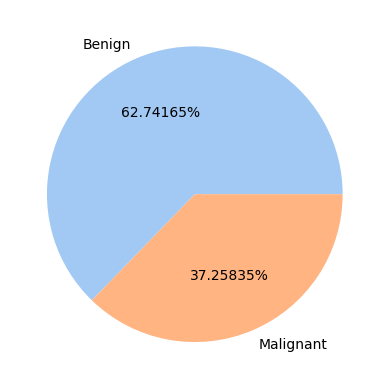

In [44]:
B, M = y.value_counts()
colors = sns.color_palette('pastel')[0:2]
data = [B, M]
labels = ['Benign', 'Malignant']
plt.pie(data, labels = labels, colors = colors, autopct = '%.5f%%')
plt.show()


<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>

<div class="card" style="width: 50rem;">
  <img src="m_vs_b.png" class="card-img-top" alt="...">
  <div class="card-body"  style="background-color:#FDF6E3;">
    <p class="card-text">(a) and (b) are benign while (c) and (d) are malignant</p>
    <p class="card-text"><small class="text-muted">Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7547332/figure/fig2/</small></p>
  </div>
</div>

<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>

<h5 style="background-color:pink;"> Diagonsis </h5>
Bengin tumors are more round and oval while malignant tumors are more irregular with lobules.




<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>

<h5 style="background-color:pink;"> Rationale </h5>
Knowing breast cancer is the most diagnosed cancer in the US given CDC statistics in 2019, I am designing a ML model using random forest to predict if a tumor measured by taking a MRI, monogram, etc. is benign or malignant.

In [45]:
y = pd.get_dummies(y).values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

Dropping the NaN values in the data along with the id as it serves no purpose for the model. There is no need to distingusih each patient because we are trying to classify the features not each patient. 

In [46]:
df.drop(labels = 'Unnamed: 32', axis = 1, inplace = True)
df.drop(labels = 'id', axis = 1, inplace = True)
df.describe()


radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>

<h5 style="background-color:pink;"> Correlation of the data  </h5>


If the data has a corrlation of 1 that means it the exactly the same. You can see across the diagonal that it is 1 because radius_mean = radius_mean. Further inspecting the data it shows not much correlation between anything past the 10th column. Even when the radius mean is compared it's standard error. 

With this in mind the heat map should be compared in 10 by 10 by 10 intervals. Meaning mean data should be compared to mean data while se (standard error) should be compared to se and so on. 

C:\Users\V\AppData\Local\Temp\ipykernel_10180\1974202416.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, fmt='.3f', annot=True)


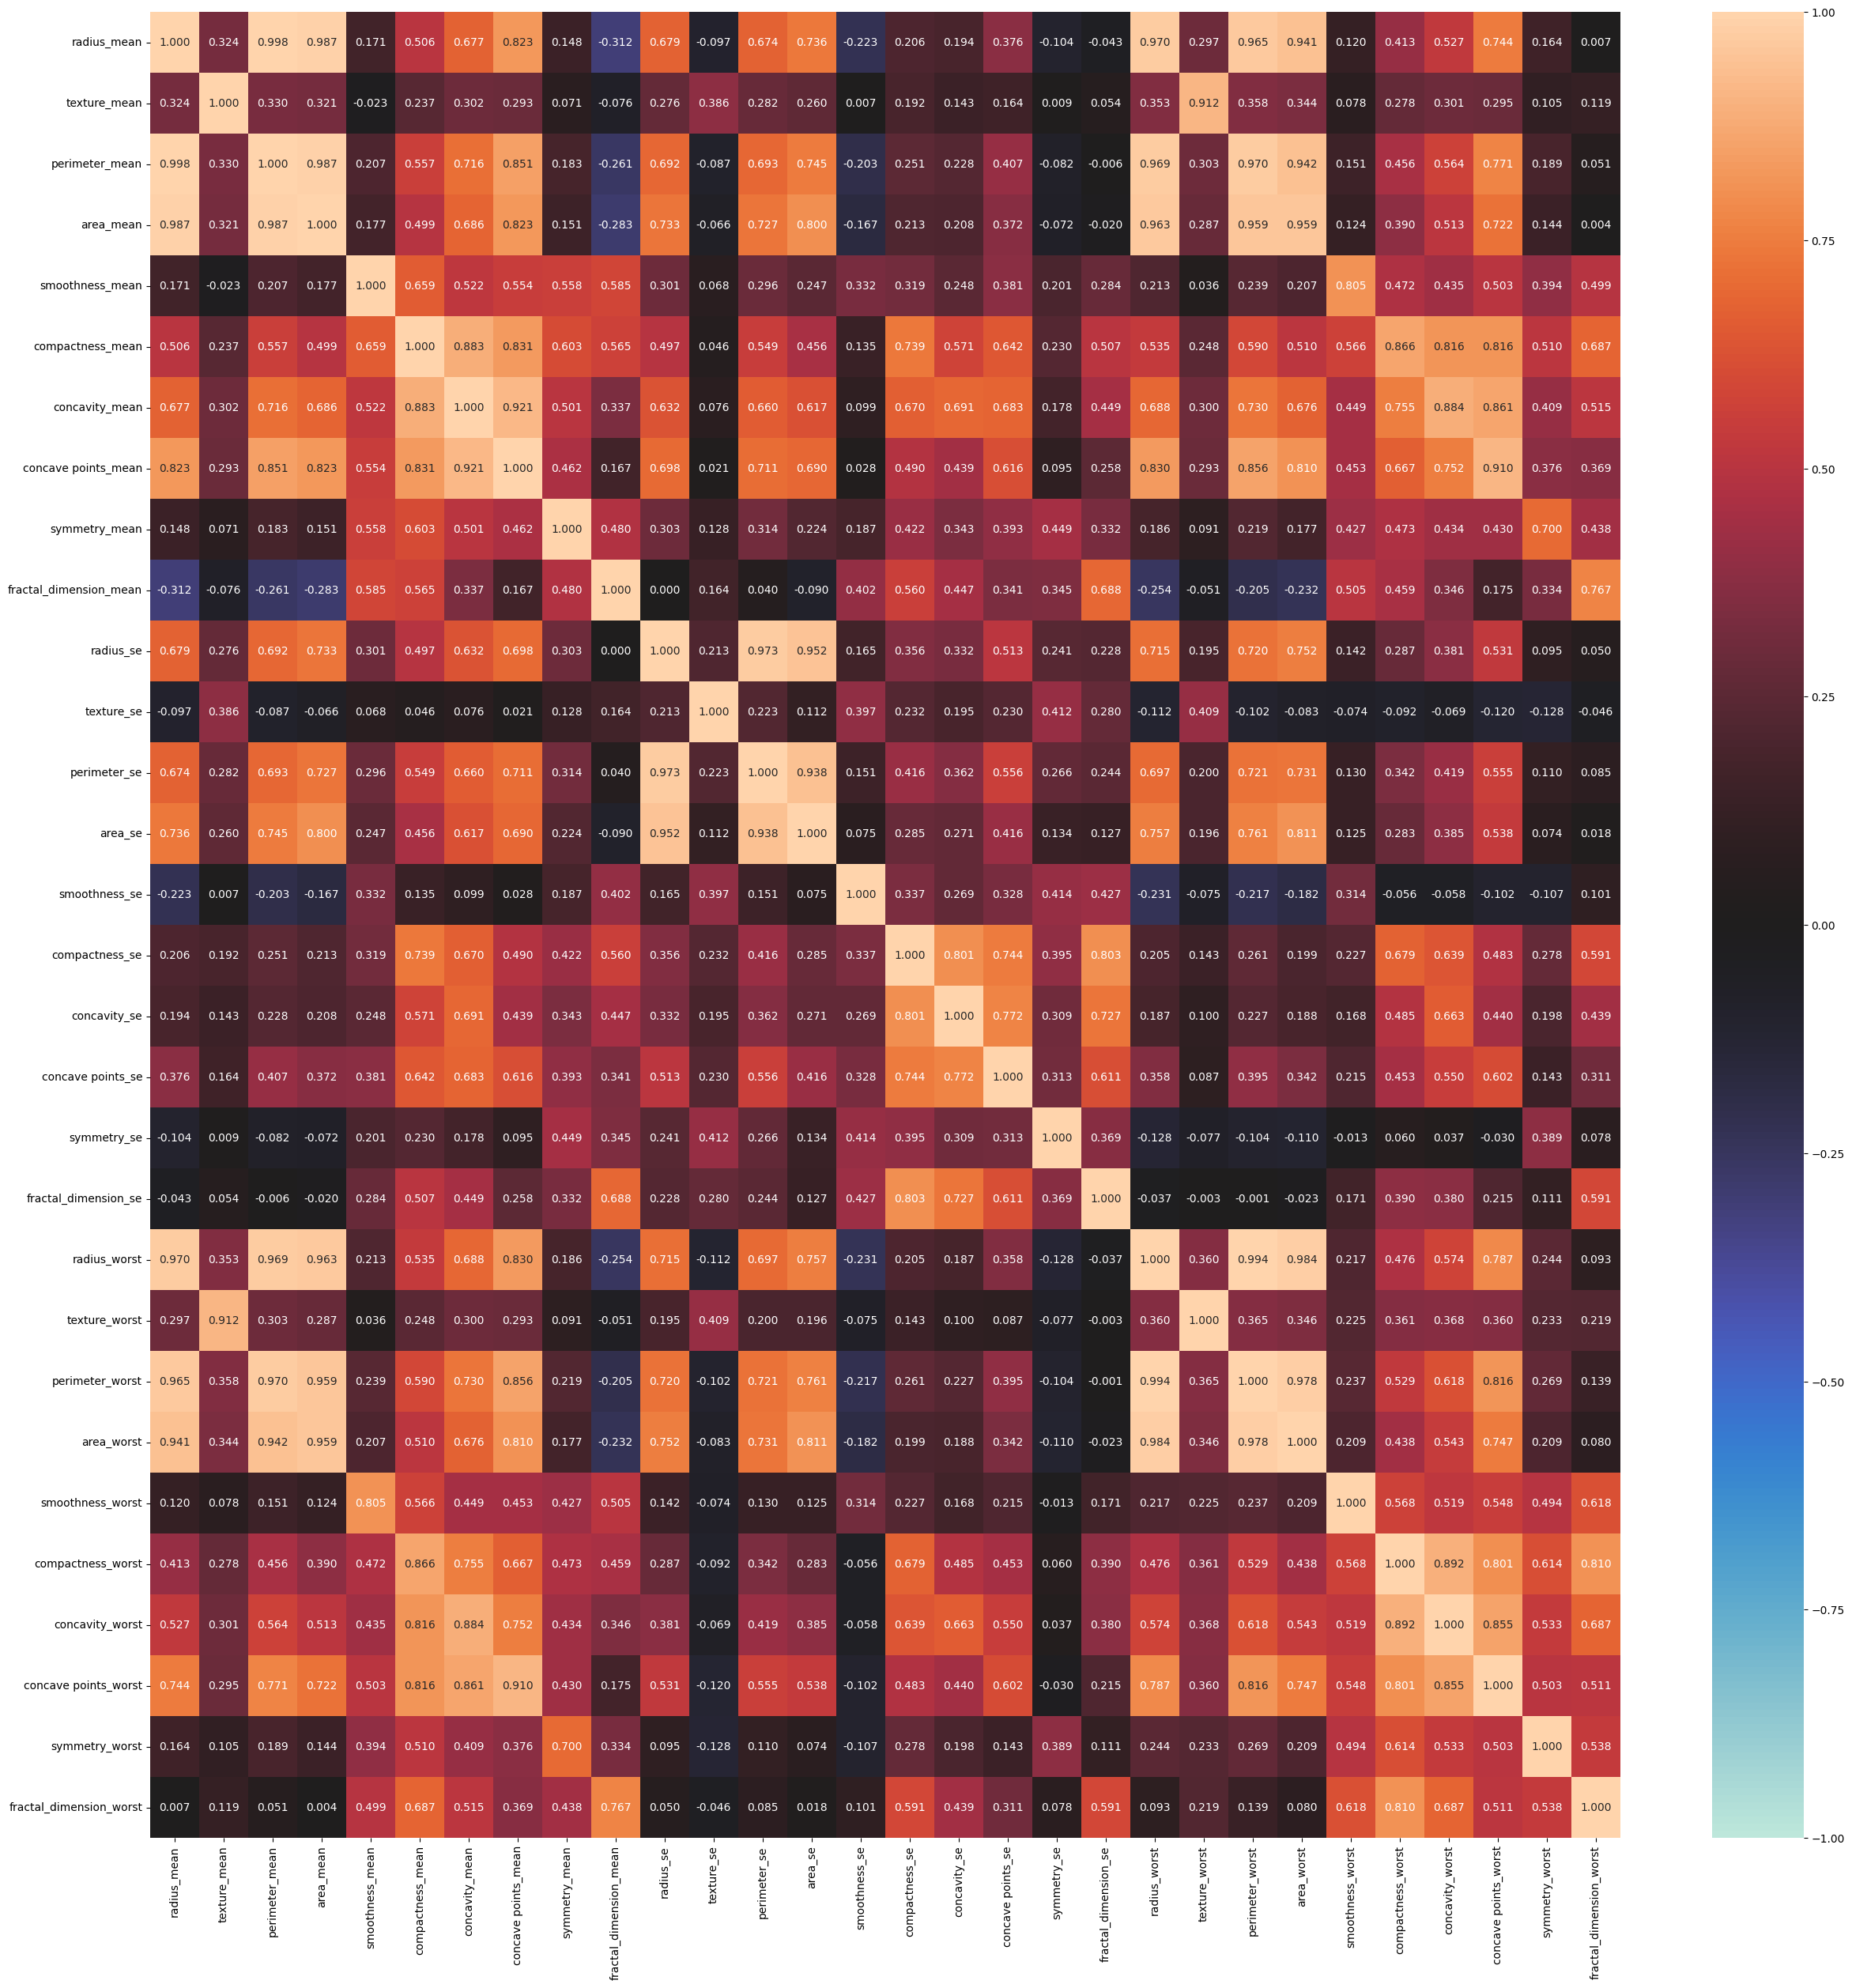

In [47]:
plt.figure(figsize=(30,30)) 
plot = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, fmt='.3f', annot=True)

More simplier correlation data for the first 10 columns which refer to the mean of the data. 

The heat map shows that radius_mean, perimeter_mean, and area_mean have very high correlation with each other. Area is found by knowing the radius and also perimeter. 

Another very high correlation in the data is compactness_mean, concavity_mean, and concavity points_mean. They are derived from the other also. 

C:\Users\V\AppData\Local\Temp\ipykernel_10180\1712937279.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(X.corr(), vmin=-1, vmax=1, center=0, fmt='.3f', annot=True)


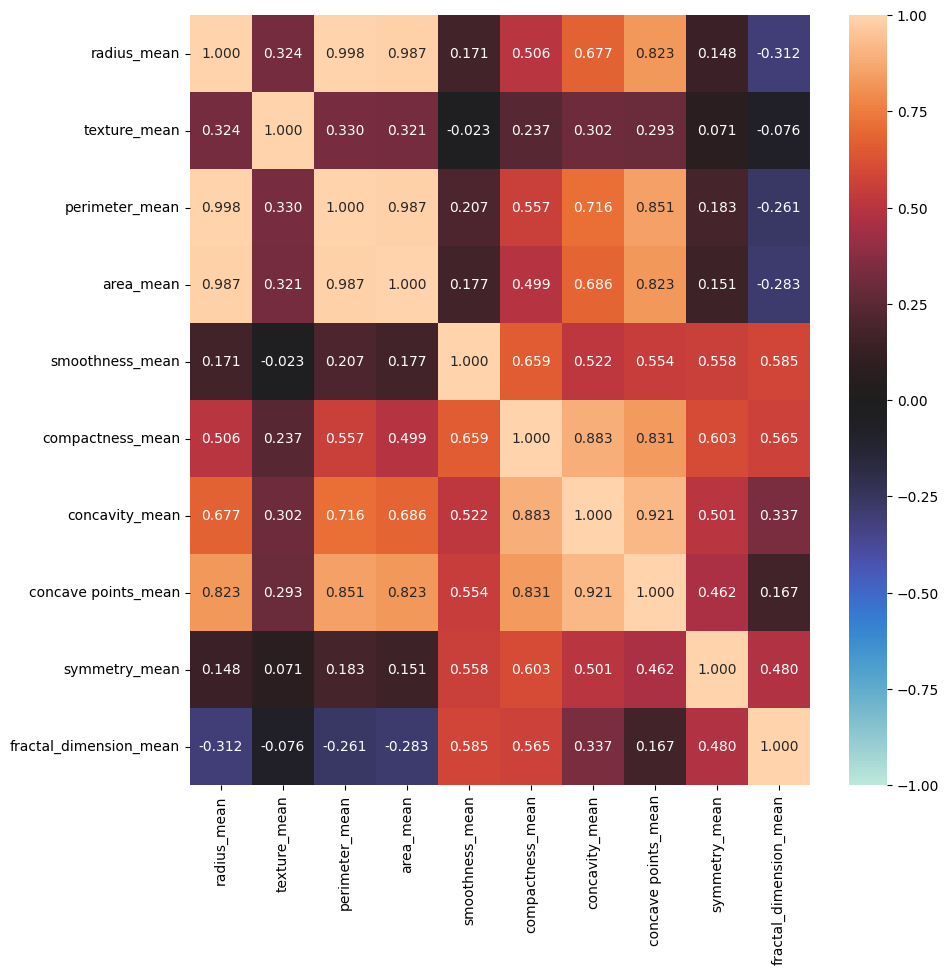

In [48]:
plt.figure(figsize=(10,10)) 
plot = sns.heatmap(X.corr(), vmin=-1, vmax=1, center=0, fmt='.3f', annot=True)

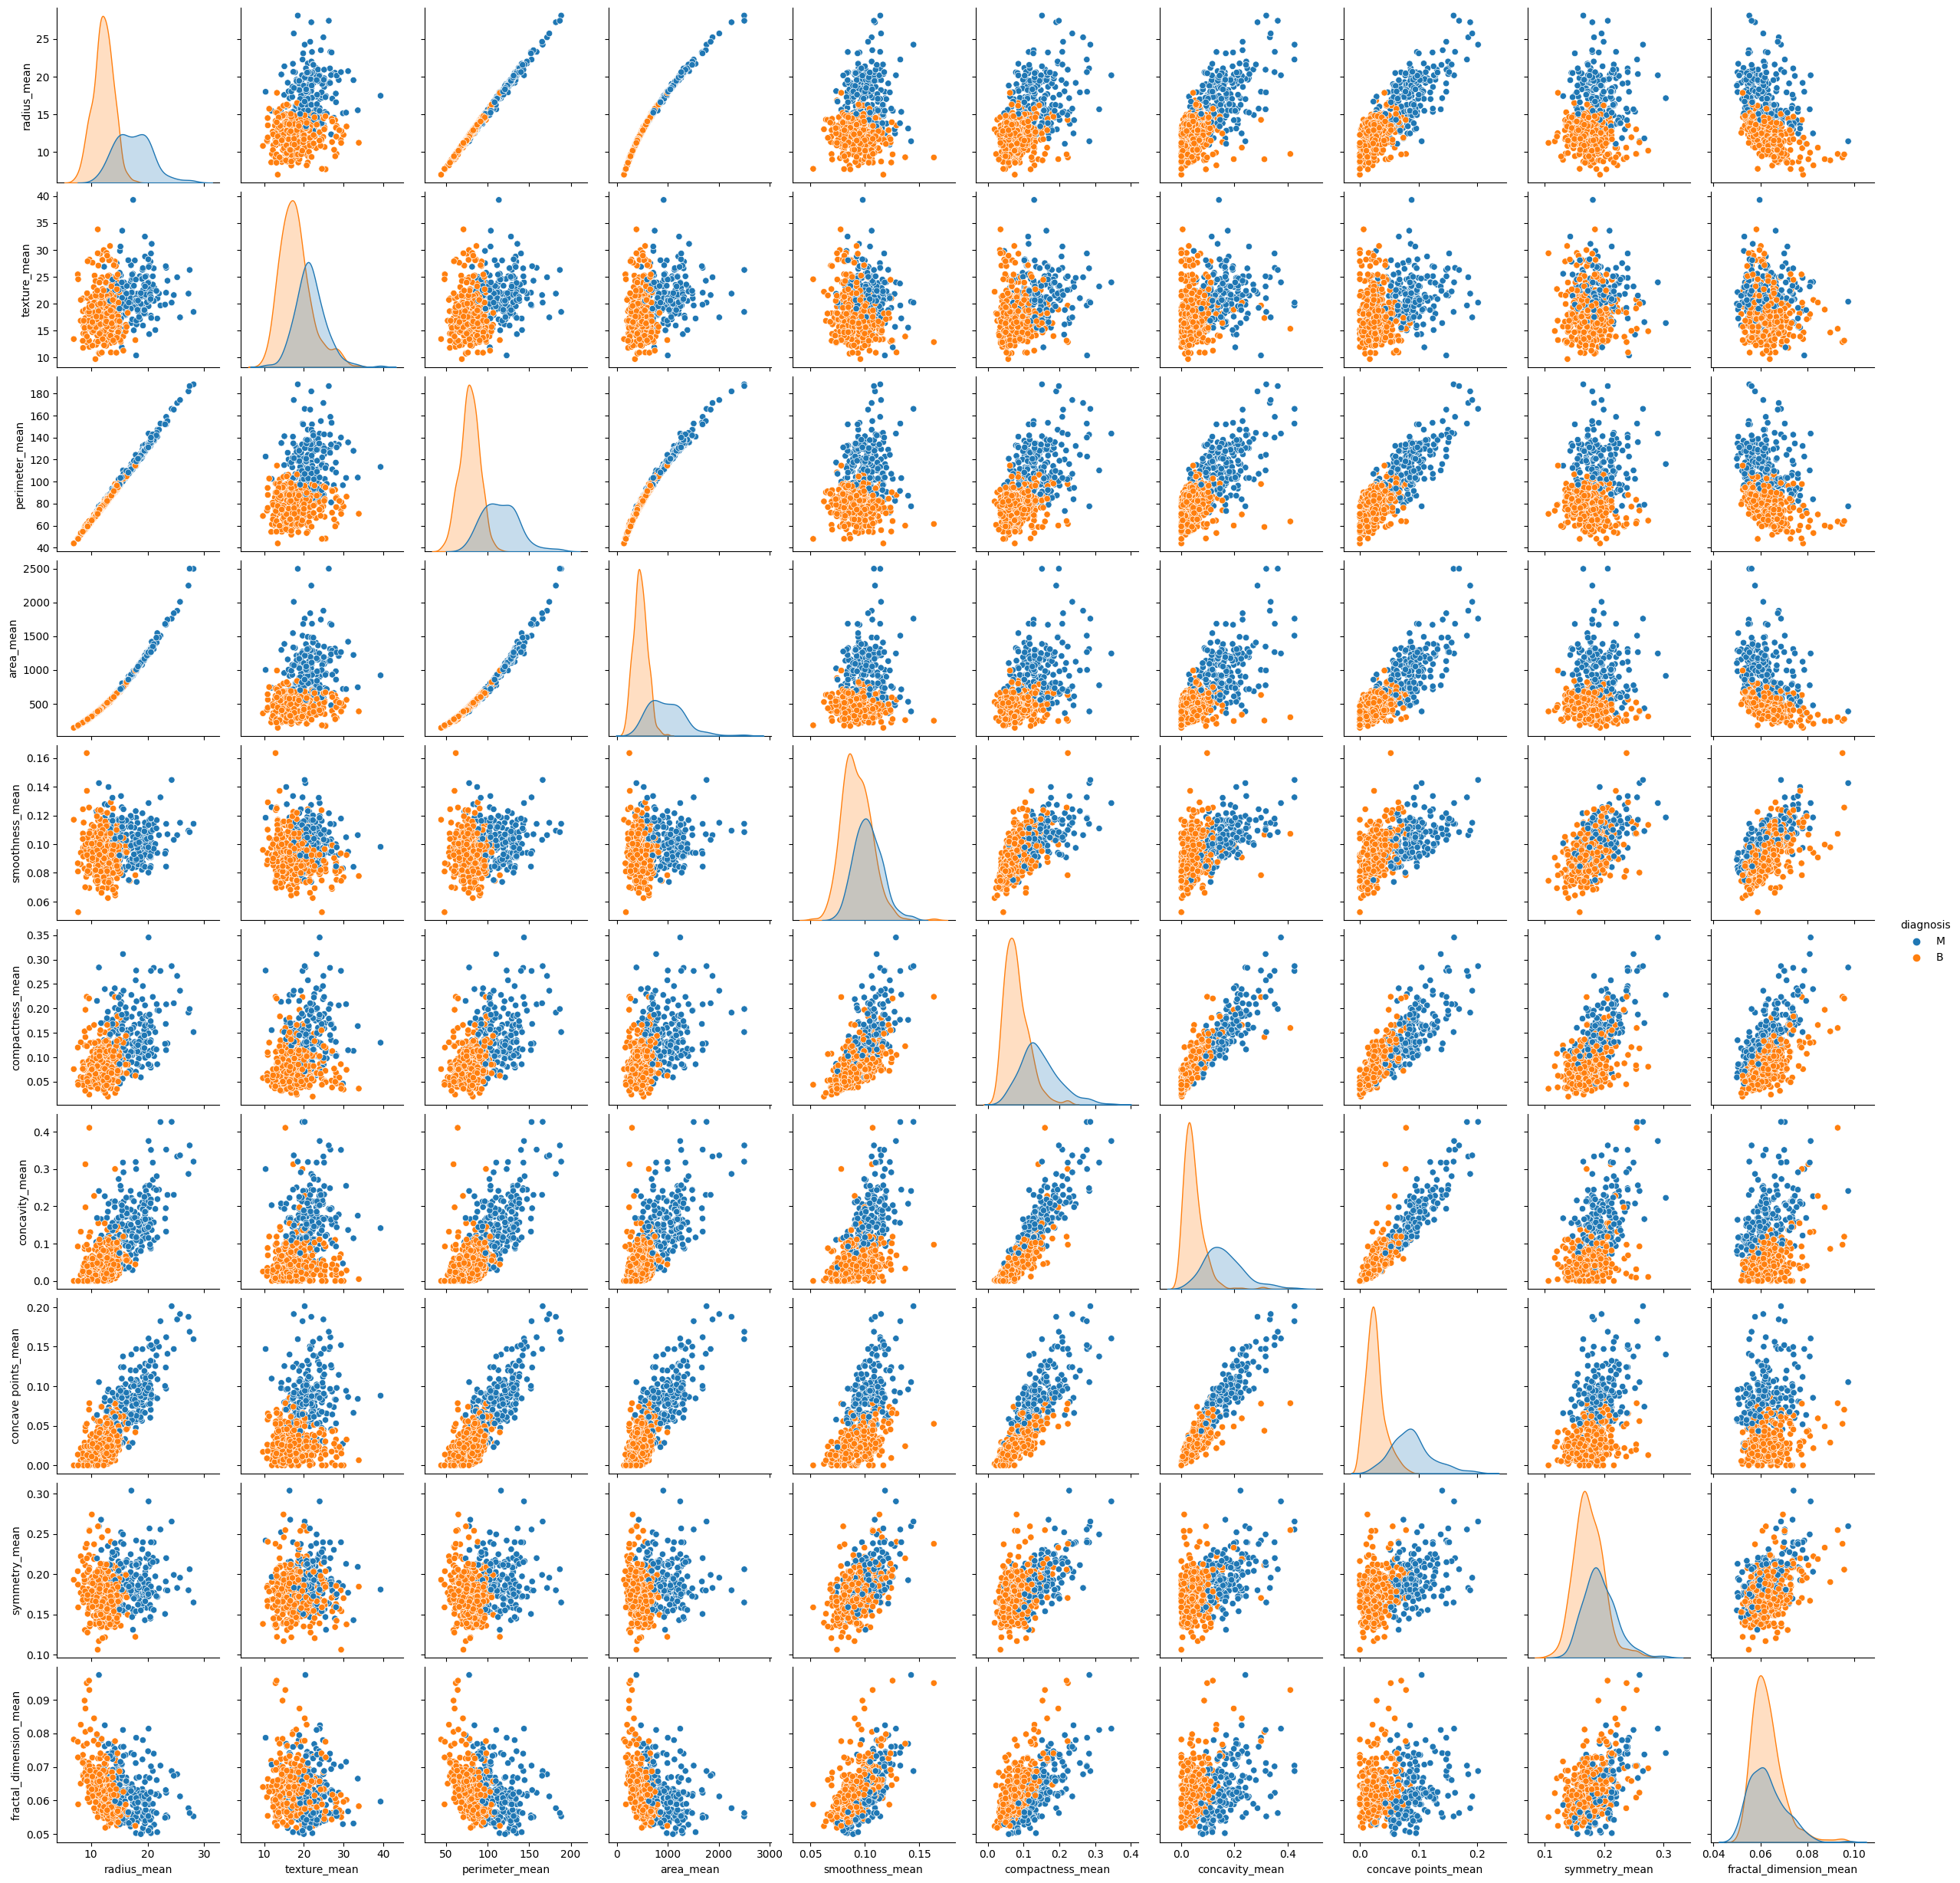

In [49]:
sns.pairplot(X, hue = 'diagnosis')

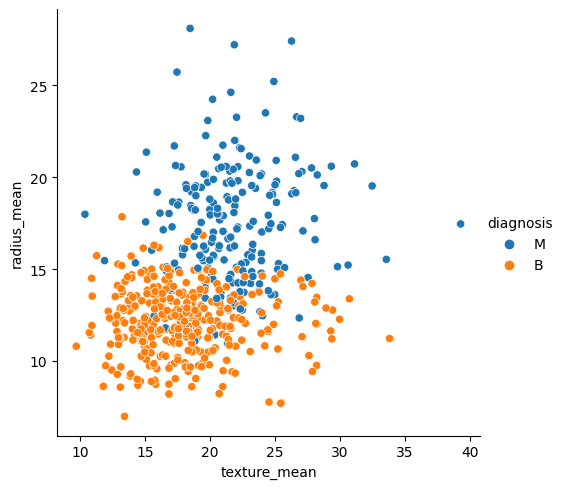

In [50]:
sns.relplot(y="radius_mean", x="texture_mean", data = X, hue = 'diagnosis')

<AxesSubplot: xlabel='texture_mean', ylabel='radius_mean'>

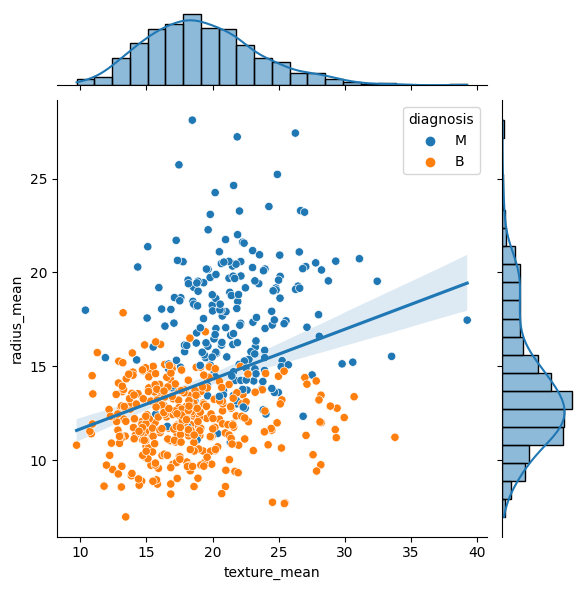

In [51]:
a = sns.jointplot(X.loc[:,['radius_mean','texture_mean']], y = 'radius_mean', x = 'texture_mean', kind="reg", scatter = False)
sns.scatterplot(x = 'texture_mean', y = 'radius_mean', data = X, hue = 'diagnosis', ax = a.ax_joint)

This is held constant in the standard error and worst as the data correlation is very similar with each other. There is some odd ones like radius with fractional dimension. The mean as negative correlation while the standard error has very low correlation and worst has little to no correlation. They mean the same thing as they are not very related. When correlation goes around above 0.7 then it is considered "multi-collinearity" meaning the two data points are correlated. 

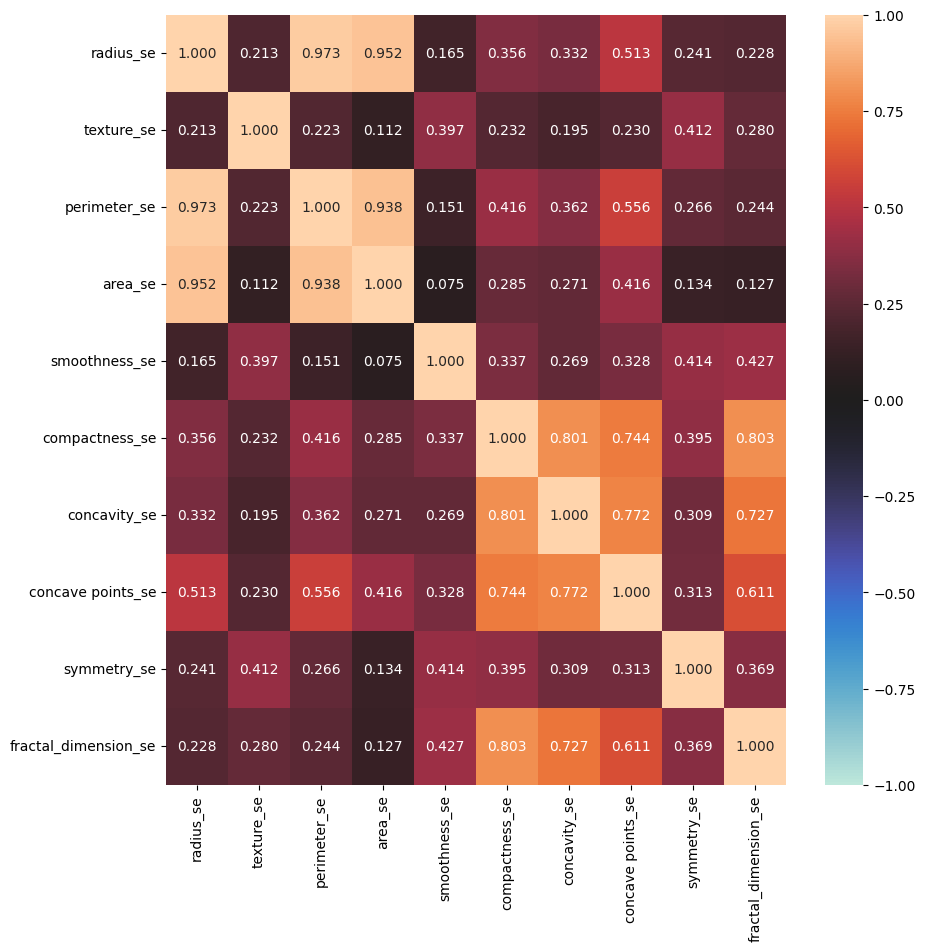

In [52]:
X_se = df.loc[:,["radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se","fractal_dimension_se"]]
plt.figure(figsize=(10,10)) 
plot = sns.heatmap(X_se.corr(), vmin=-1, vmax=1, center=0, fmt='.3f', annot=True)

As you can see when you compare individually the radius has nothing in common with the fratial dimension. 

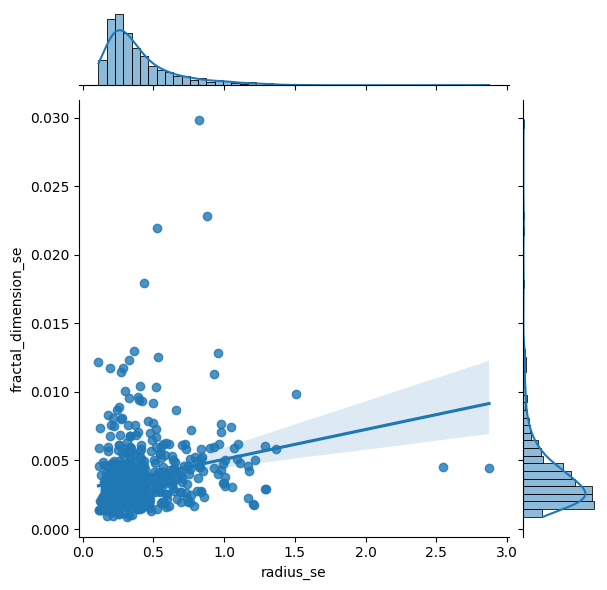

In [53]:
sns.jointplot(X_se.loc[:,['radius_se','fractal_dimension_se']], x = 'radius_se', y = 'fractal_dimension_se', kind="reg")

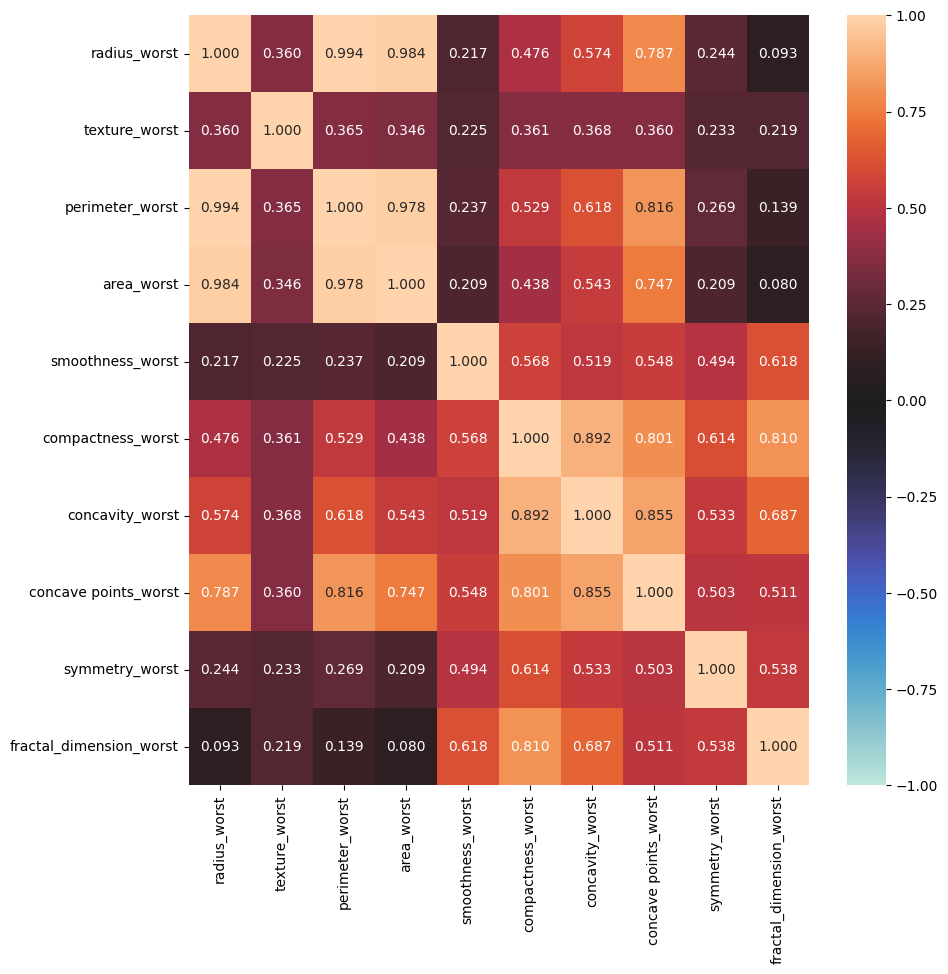

In [54]:
X_worst = df.loc[:,["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst","fractal_dimension_worst"]]
plt.figure(figsize=(10,10)) 
plot = sns.heatmap(X_worst.corr(), vmin=-1, vmax=1, center=0, fmt='.3f', annot=True)

<link rel="stylesheet" href="styles.css">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-kenU1KFdBIe4zVF0s0G1M5b4hcpxyD9F7jL+jjXkk+Q2h455rYXK/7HAuoJl+0I4" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.11.6/dist/umd/popper.min.js" integrity="sha384-oBqDVmMz9ATKxIep9tiCxS/Z9fNfEXiDAYTujMAeBAsjFuCZSmKbSSUnQlmh/jp3" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.min.js" integrity="sha384-cuYeSxntonz0PPNlHhBs68uyIAVpIIOZZ5JqeqvYYIcEL727kskC66kF92t6Xl2V" crossorigin="anonymous"></script>

<h5 style="background-color:pink;"> Random forest </h5>


An algorthmn used to split the dataset into multiple different sections to form different decision trees. Each decision tree will make their own prediction and after training the individual trees the overall descision is selected upon majority. For the first test it would be performed on the mean data of the first 10 features and not the standard error and worst. 



In [55]:
X = df.loc[:,["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean","fractal_dimension_mean"]]

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

model = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
datas = model.fit(X_train, y_train)
model.score(X_test, y_test)

prediction = model.predict(X_test)
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       108
           1       0.90      0.95      0.92        63

   micro avg       0.94      0.93      0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.93      0.94       171
 samples avg       0.93      0.93      0.93       171



c:\Users\V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision accuracy how many percent of maligment and belign tumors were predicted correctly. 

Recall score is the ratio of TRUE positives : TRUE positives + FALSE negatives. <br>
True positive = prediction values is positive and actual value is also positive. <br>
False negative = prediction value is negative but the actual value is negative.

f1-score is = 2 * (precision * recall) / (precision + recall), it is defined as the harmonic mean between the two values of precision and recall.

support is the number of occurances of each class that was predicted upon. Meaning 108 occurances of 0 and 63 of 1. Totalling to 171. Which is correct because 171/569 around 0.3 which was the test_size. 

In [57]:
cm = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1)) 
cm

array([[101,   7],
       [  3,  60]], dtype=int64)

Text(95.72222222222221, 0.5, 'Turth')

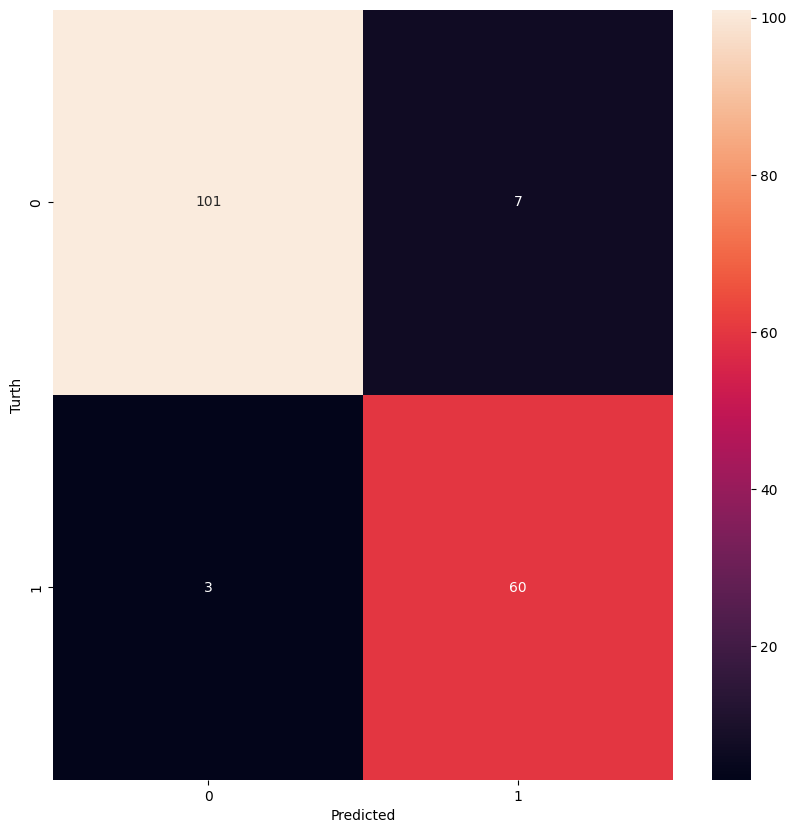

In [58]:
plt.figure(figsize=(10,10)) 
sns.heatmap(cm, annot=True,fmt=".3g")
plt.xlabel('Predicted')
plt.ylabel('Turth')


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.90      0.90        63

   micro avg       0.93      0.93      0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171
 samples avg       0.93      0.93      0.93       171



Text(95.72222222222221, 0.5, 'Turth')

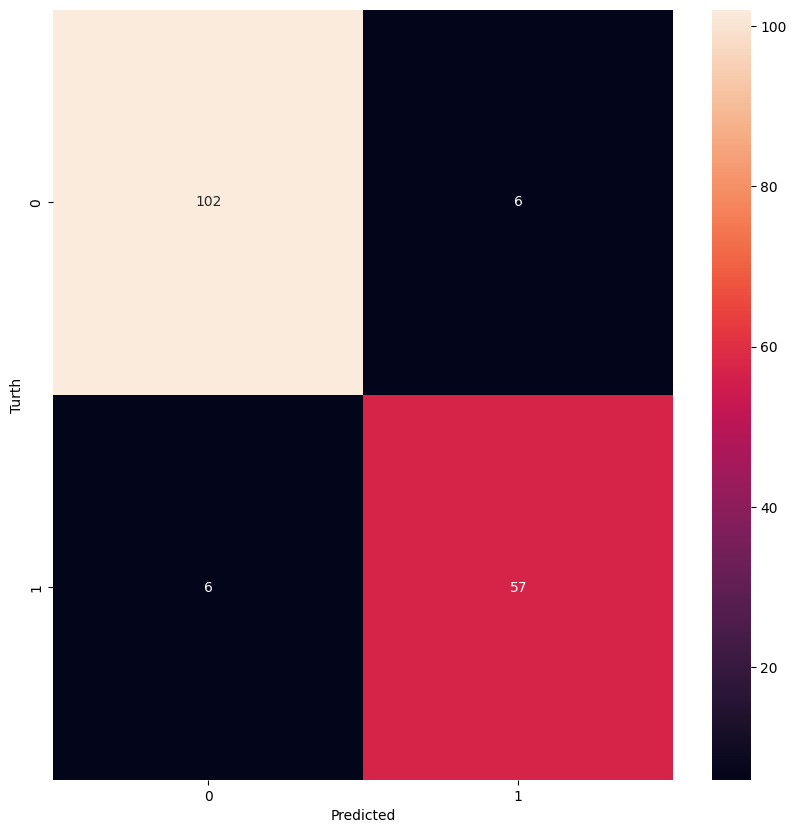

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
datas = model.fit(X_train, y_train)
model.score(X_test, y_test)

prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1)) 
cm
plt.figure(figsize=(10,10)) 
sns.heatmap(cm, annot=True,fmt=".3g")
plt.xlabel('Predicted')
plt.ylabel('Turth')

In [60]:
plt.figure(figsize = (30,30))
tree.plot_tree(datas.estimators_[0], filled = True)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'estimators_'

<Figure size 3000x3000 with 0 Axes>

[Text(0.7291666666666666, 0.95, 'X[2] <= 98.405\ngini = 0.47\nsamples = 251\nvalue = [[150, 248]\n[248, 150]]'),
 Text(0.5833333333333334, 0.85, 'X[5] <= 0.167\ngini = 0.204\nsamples = 173\nvalue = [[32, 245]\n[245, 32]]'),
 Text(0.5416666666666666, 0.75, 'X[6] <= 0.093\ngini = 0.145\nsamples = 165\nvalue = [[21, 245]\n[245, 21]]'),
 Text(0.375, 0.65, 'X[1] <= 19.585\ngini = 0.071\nsamples = 151\nvalue = [[9, 234]\n[234, 9]]'),
 Text(0.20833333333333334, 0.55, 'X[7] <= 0.049\ngini = 0.034\nsamples = 110\nvalue = [[3, 172]\n[172, 3]]'),
 Text(0.125, 0.45, 'X[0] <= 11.78\ngini = 0.012\nsamples = 105\nvalue = [[1, 162]\n[162, 1]]'),
 Text(0.08333333333333333, 0.35, 'X[3] <= 428.55\ngini = 0.03\nsamples = 44\nvalue = [[1, 65]\n[65, 1]]'),
 Text(0.041666666666666664, 0.25, 'gini = 0.0\nsamples = 43\nvalue = [[0, 65]\n[65, 0]]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]]'),
 Text(0.16666666666666666, 0.35, 'gini = 0.0\nsamples = 61\nvalue = [[0, 97]\n[97, 0]]'),
 

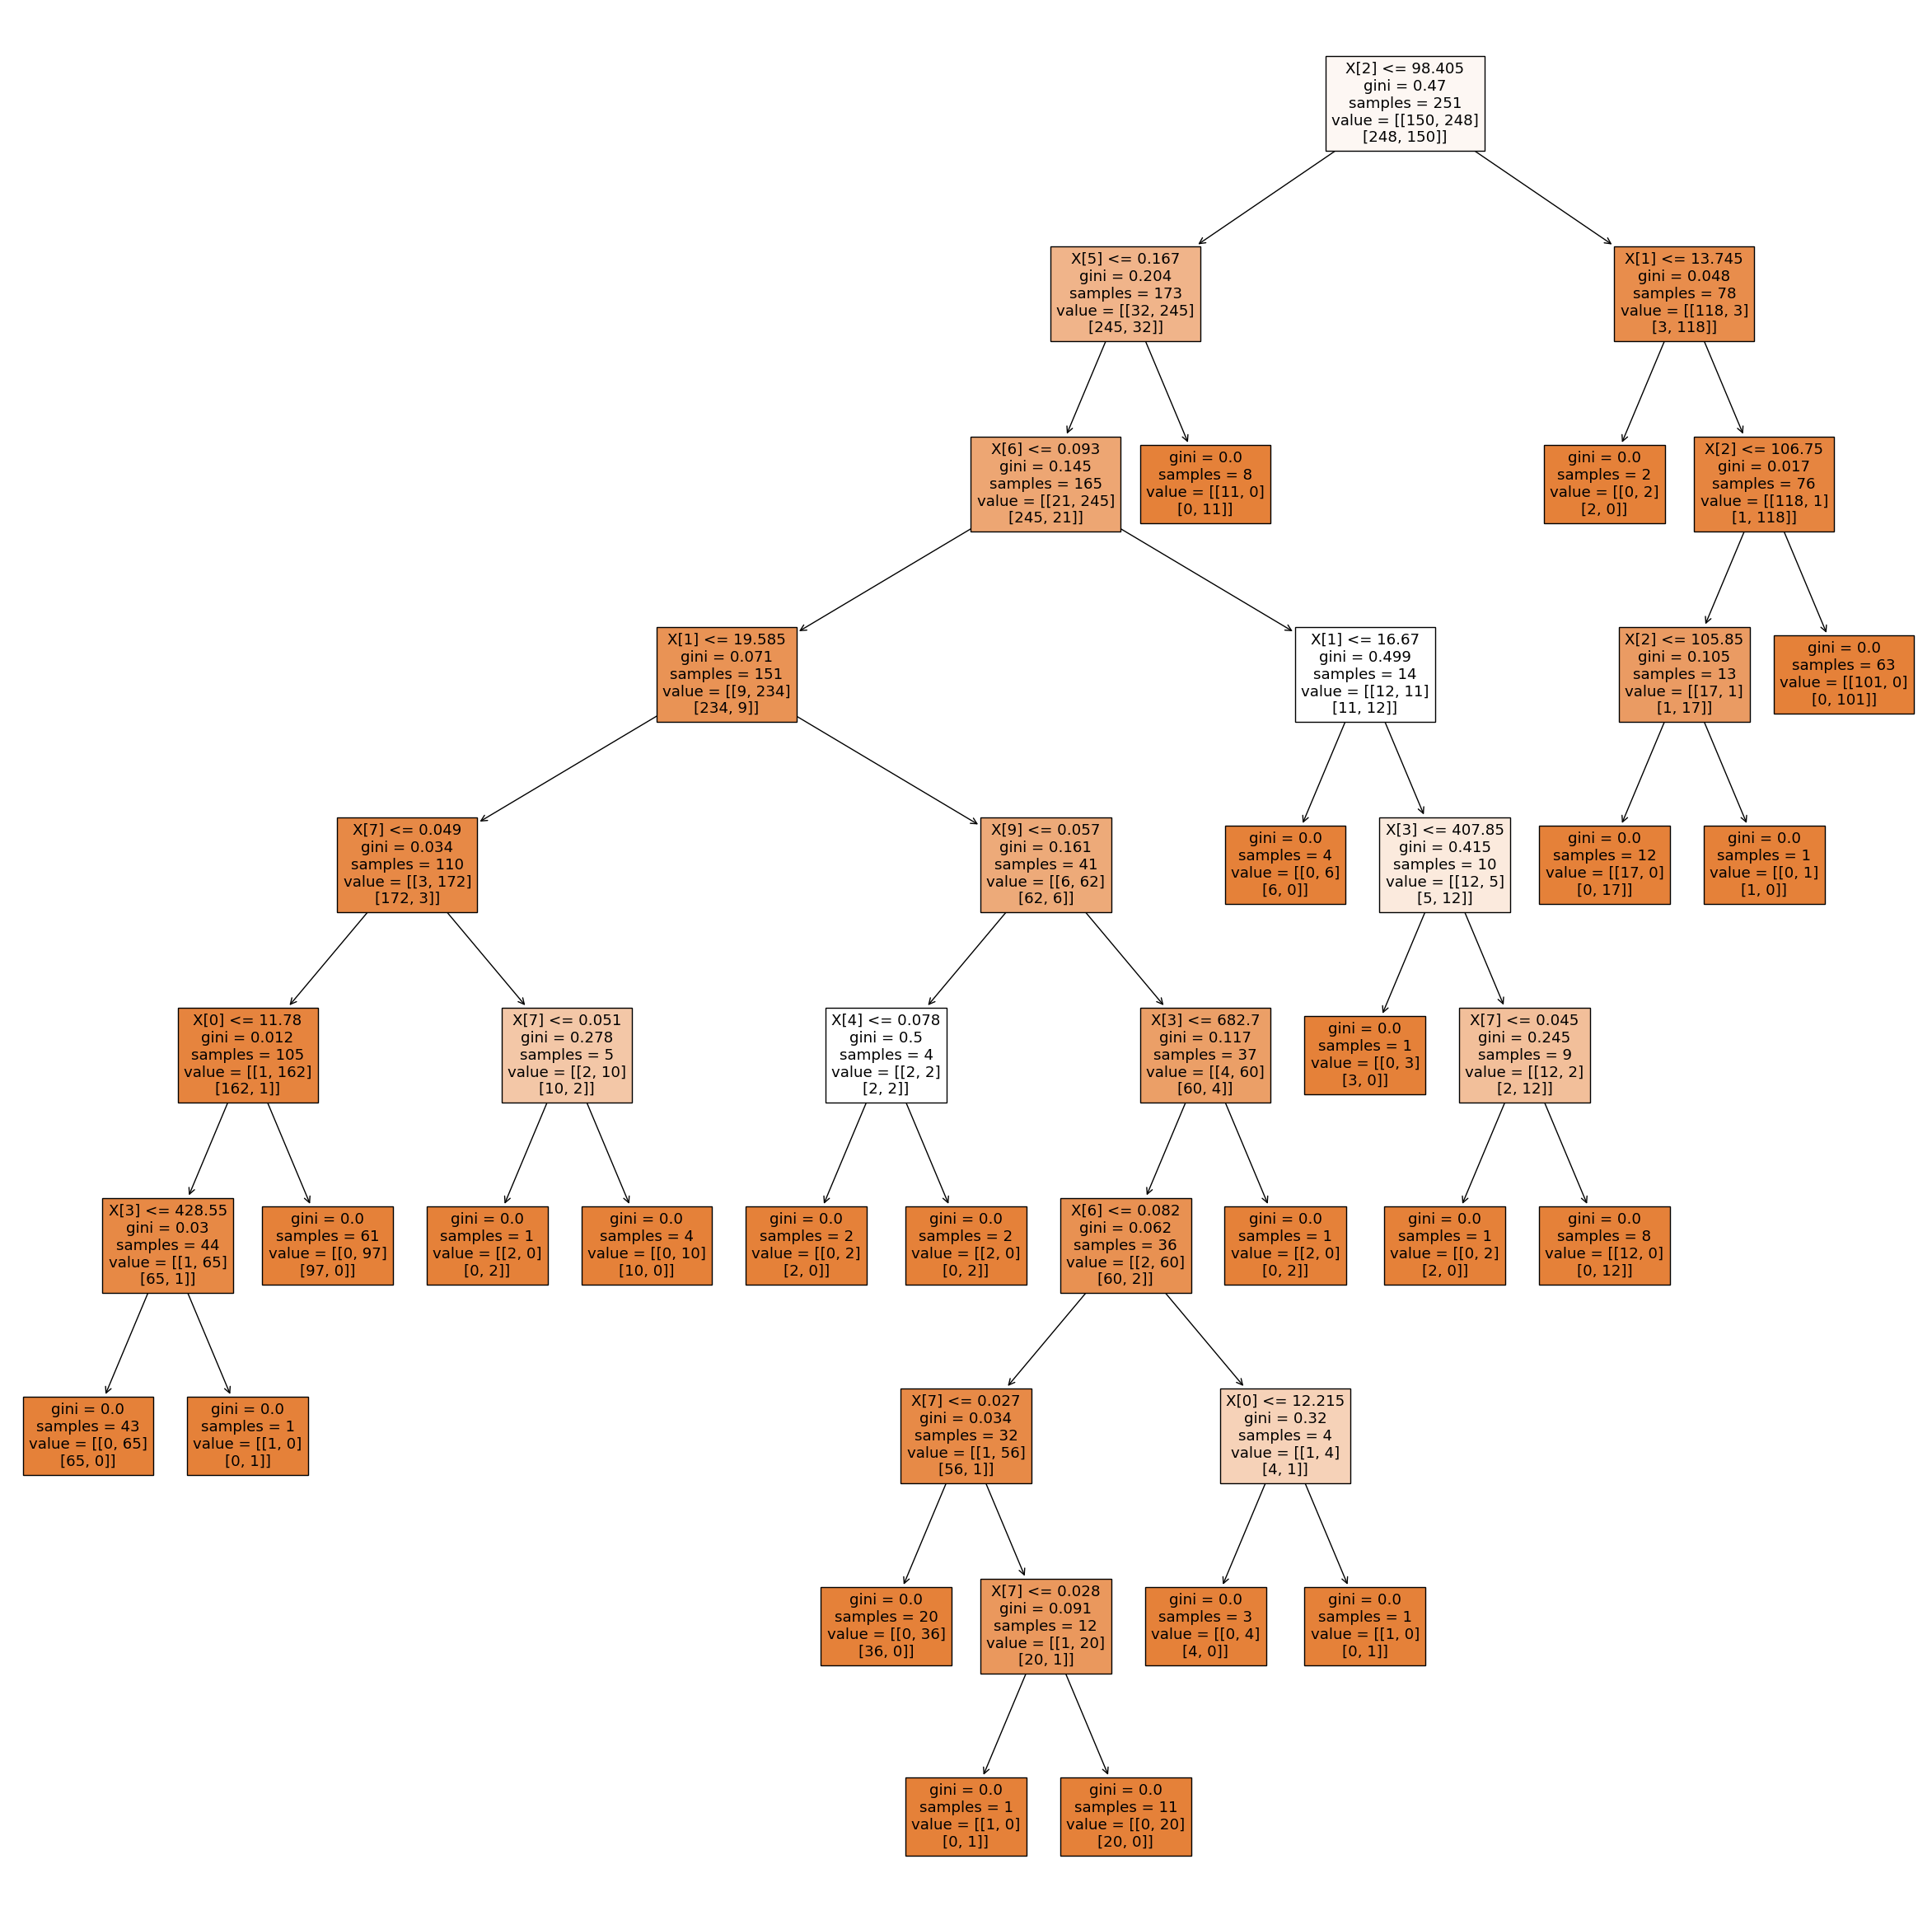

In [ ]:
plt.figure(figsize = (30,30))
tree.plot_tree(datas.estimators_[2], filled = True)

Doing the same random forest but on the entire dataset

In [ ]:
df.drop(labels="diagnosis", axis = 1, inplace = True)

KeyError: "['diagnosis'] not found in axis"

In [ ]:
model = RandomForestClassifier(n_estimators=200)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state=0)
datas = model.fit(X_train, y_train)
model.score(X_test, y_test)

prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

   micro avg       0.97      0.97      0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171
 samples avg       0.97      0.97      0.97       171



In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1)) 
cm

array([[104,   4],
       [  1,  62]], dtype=int64)

Text(95.72222222222221, 0.5, 'Turth')

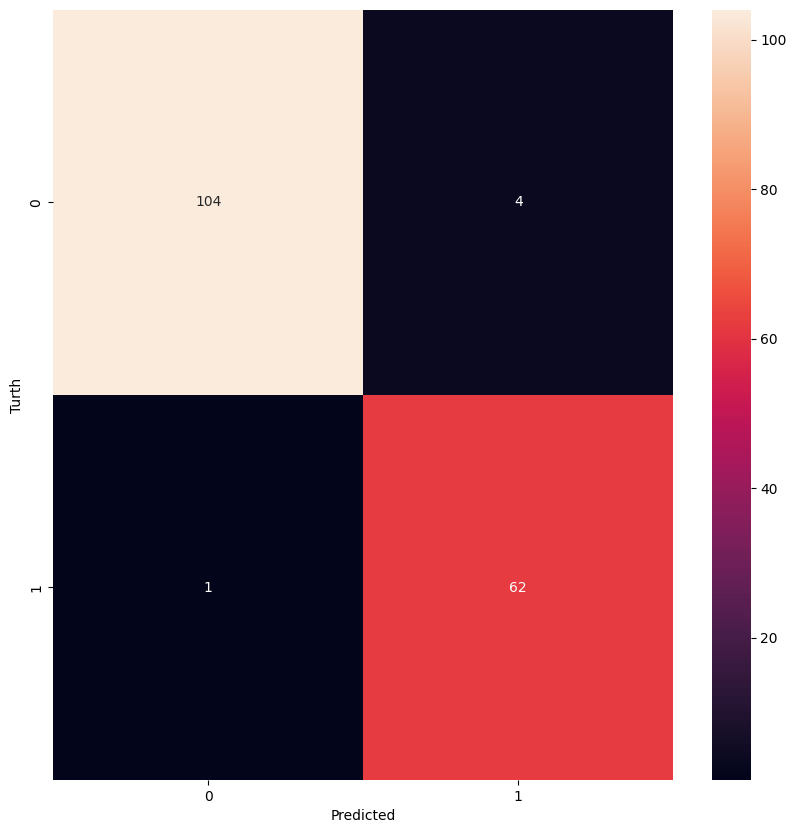

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(cm, annot=True,fmt=".3g")
plt.xlabel('Predicted')
plt.ylabel('Turth')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state=0)
datas = model.fit(X_train, y_train)
model.score(X_test, y_test)

prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       108
           1       0.84      0.94      0.89        63

   micro avg       0.91      0.91      0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171
 samples avg       0.91      0.91      0.91       171



Text(95.72222222222221, 0.5, 'Turth')

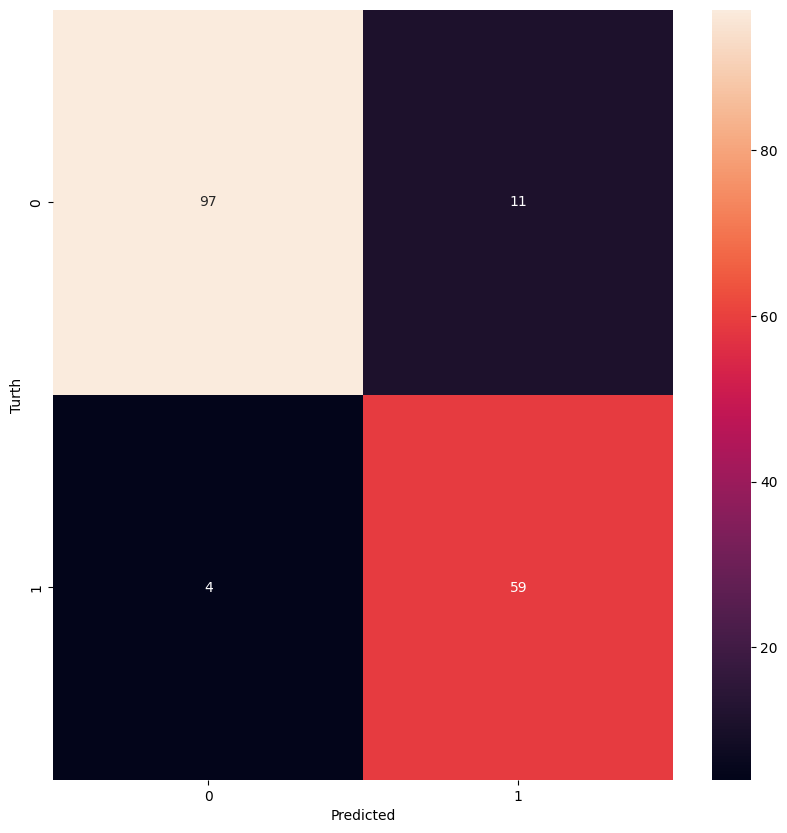

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1)) 
cm
plt.figure(figsize=(10,10)) 
sns.heatmap(cm, annot=True,fmt=".3g")
plt.xlabel('Predicted')
plt.ylabel('Turth')

Sources: 
[1] https:// jamanetwork(dot)com/journals/jamaoncology/fullarticle/2768634